# Pytorch Computer vision

* See reference online book: https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch in CV.
* `torchvision.datasets` - get dtasets and data loading funciotns for CV.
* `torchvision.models` - get pretrained computer vision models that you can levarage for your own problem.
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with and ML model.
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` -Creates a Pytorch iterable over a dataset.

In [1]:
# Import PyTorch
import torch
from torch import nn
from torch.utils.data import dataloader
# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Getting a dataset

The dataset we'll be using FashionMNIST from `torchvision.datasets`

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
	root="data", # where to download data to?
	train = True, # Do we want the training dataset?
	download=True, # Do we want to download y/n?
	transform=torchvision.transforms.ToTensor(), # How do we want to transform the data?
	target_transform=None # How do we want to transform the labels/targets?
	)

test_data = datasets.FashionMNIST(
	root="data",
	train=False,
	download=True,
	transform=ToTensor(),
	target_transform=None
)

In [3]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
len(train_data) ,len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 Check input and output shapes of data

In [7]:
# Check the shape of our image
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing our data

Text(0.5, 1.0, '9')

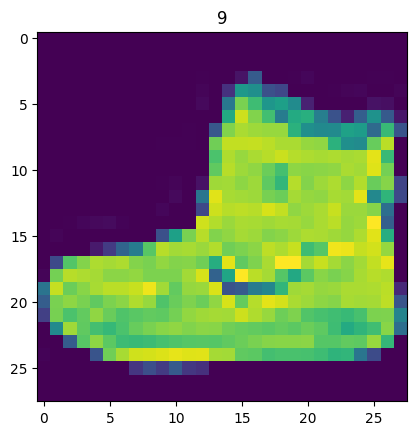

In [8]:
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

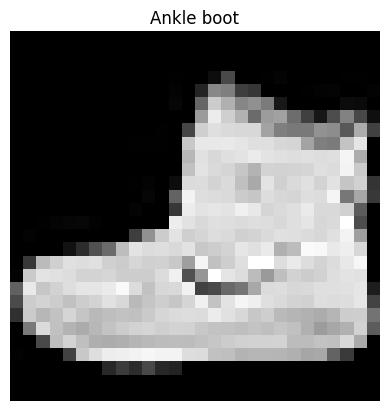

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

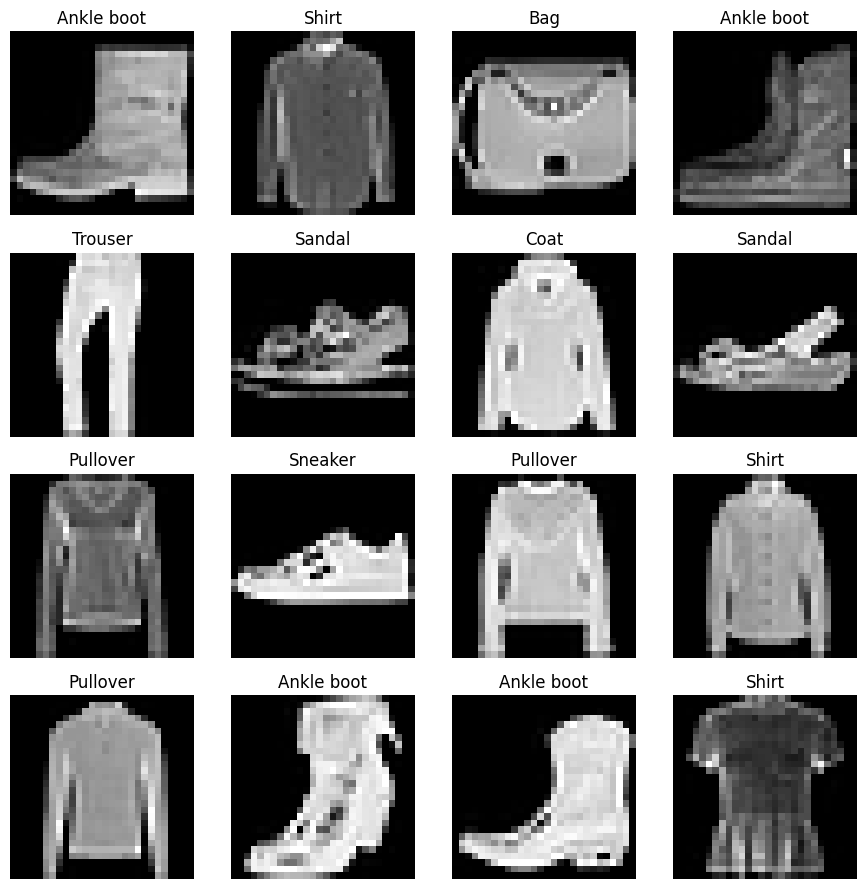

In [10]:
# Plot more iamges
torch.manual_seed(42)
fig, axes = plt.subplots(4, 4, figsize=(9, 9))  # Crear una figura con subgráficos
rows, cols = 4, 4

for i in range(rows * cols):
	random_idx = torch.randint(0, len(train_data), size=[1]).item()
	img, label = train_data[random_idx]
	
	ax = axes[i // cols, i % cols]  # Seleccionar el subgráfico adecuado
	ax.imshow(img.squeeze(), cmap="gray")
	ax.set_title(class_names[label])
	ax.axis("off")  # Ocultar los ejes 

plt.tight_layout()  # Ajustar la distribución de los gráficos
plt.show()  # Mostrar la figura correctamente


Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare data loader

Right now, our data is in the form of pytorch datasets.

Data Loader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches (or mini-batches) 

Why would we do this?

1. It's more computationally efficient, as in, your computing hardware  may not be able to look (store in memory)at 6000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update it's gradients per epoch.

Note: The train dataset it's shuffled to remove order. But for evaluation purposes the test dataset isn't shuffled because our model will never see this dataset

In [12]:
from torch.utils.data import DataLoader

# Setup th batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (Data)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7238a1a3b380>,
 <torch.utils.data.dataloader.DataLoader at 0x72389a82ca50>)

In [13]:
# Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7238a1a3b380>, <torch.utils.data.dataloader.DataLoader object at 0x72389a82ca50>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


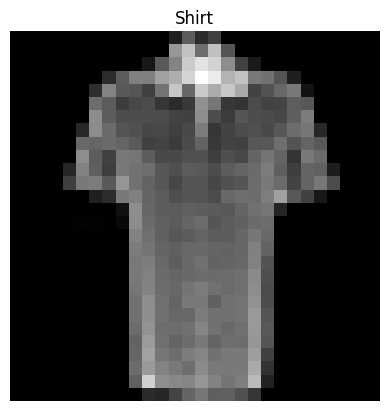

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {image.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and imporve upon with subsequent model/experiments.

In other words: start simply and add complexity when necessary

In [16]:
# Create a flatten layer
flatten_model =nn.Flatten()

# Get a sample 
x = train_features_batch[0] # Batch 0

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
	def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
		super().__init__()
		self.layer_stack = nn.Sequential(
			nn.Flatten(),
			nn.Linear(in_features=input_shape, out_features=hidden_units),
			nn.Linear(in_features=hidden_units, out_features=output_shape)
		)
	
	def forward(self, x):
		return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
	input_shape=784, #This is 28*28
	hidden_units=10, #How many units in the hidden layer
	output_shape=len(class_names) # One for every class
	)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metric

* Loss function -since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`

* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)

* Evaluation metric- since we're working on a classification problem, let's use accuracy as our evaluation metric

In [21]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
	print("helper_functions.py already exists, skipping download...")
else:
	print("Downloading helper_functions.py")
	request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
	with open("helper_functions.py", "wb") as f:
		f.write(request.content)

helper_functions.py already exists, skipping download...


In [22]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy, values, etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
	""" Prints difference between start and end time."""
	
	total_time = end - start
	print(f"Train time on {device}: {total_time:.3f} seconds")
	
	return total_time

In [24]:
start_time = timer()

# some code ..
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cuda")

Train time on cuda: 0.000 seconds


3.1989000035537174e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time ir all (for fun).

In [25]:
enumerate(train_dataloader)

In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
	print(f"Epoch: {epoch}\n-------")
	### Training
	train_loss = 0
	# Add a loop to loop through training batches
	for batch, (X, y) in enumerate(train_dataloader):
		model_0.train() 
		# 1. Forward pass
		y_pred = model_0(X)

		# 2. Calculate loss (per batch)
		loss = loss_fn(y_pred, y)
		train_loss += loss # accumulatively add up the loss per epoch 

		# 3. Optimizer zero grad
		optimizer.zero_grad()

		# 4. Loss backward
		loss.backward()

		# 5. Optimizer step
		optimizer.step()

		# Print out how many samples have been seen
		if batch % 400 == 0:
			print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

	# Divide total train loss by length of train dataloader (average loss per batch per epoch)
	train_loss /= len(train_dataloader)
	
	### Testing
	# Setup variables for accumulatively adding up loss and accuracy 
	test_loss, test_acc = 0, 0 
	model_0.eval()
	with torch.inference_mode():
		for X, y in test_dataloader:
			# 1. Forward pass
			test_pred = model_0(X)
		   
			# 2. Calculate loss (accumulatively)
			test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

			# 3. Calculate accuracy (preds need to be same as y_true)
			test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
		
		# Calculations on test metrics need to happen inside torch.inference_mode()
		# Divide total test loss by length of test dataloader (per batch)
		test_loss /= len(test_dataloader)

		# Divide total accuracy by length of test dataloader (per batch)
		test_acc /= len(test_dataloader)

	## Print out what's happening
	print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
										   end=train_time_end_on_cpu,
										   device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 25.519 seconds


## 4. Make predictions and get Model0 results

In [ ]:
import torch.utils.data.dataloader


torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
	"""Return a dictionary containing the results of model predicting on data_loader."""
	loss, acc = 0, 0
	model.eval()
	with torch.inference_mode():
		for X, y in tqdm(data_loader):
			# Make predictions
			y_pred = model(X)
			
			# Accumulate the loss and acc values per batch
			loss += loss_fn(y_pred, y)
			acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
			
		# Scale the loss and acc to find the average loss/acc per batch
		loss /= len(data_loader)
		acc /= len(data_loader)
		
	return {"model_name ": model.__class__.__name__, # Only works where model was created a class
		"model_loss": loss.item(),
		"model_acc": acc}

# Calculate model 0 results on test dataset 
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name ': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU)

In [28]:
# Setup device-agnostic code
device = "cuda"

## 6. Model 1: Building a better model with non-linearity

@e learned about the power of non-linearity in notebook 02 - https://www.learnpytorch.io/02_pytorch_classification/

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
	def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
		super().__init__()
		self.layer_stack = nn.Sequential(
			nn.Flatten(), # flatten inputs into a single vector
			nn.Linear(in_features=input_shape, out_features=hidden_units),
			nn.ReLU(),
			nn.Linear(in_features=hidden_units, out_features=output_shape),
			nn.ReLU()
		)
	
	def forward(self, x: torch.Tensor):
		return self.layer_stack(x)

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available

next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [97]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # Measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # Tries yo update our model's parameters to reduce the loss
							lr = 0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* Training loop - `train_step()`
* Testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn,
			device: torch.device = device):
	"""Performs a training with model trying to learn on data loader"""
	
	### Training
	train_loss, train_acc = 0, 0
		
	# Put model into training mode
	model.to("cuda")
	model.train()
	
	# Add a loop to loop through the raining batches
	for batch, (X, y) in enumerate(data_loader):
		# Put data on target device
		X, y = X.to("cuda"), y.to("cuda")

		# 1. Forward pass
		y_pred = model(X)
		
		# 2. Calculate loss and accuracy(per batch)
		loss = loss_fn(y_pred, y)
		train_loss += loss #accumulate train loss
		train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

		# 3. Optimizer zero grad
		optimizer.zero_grad()

		# 4. Loss backward
		loss.backward()

		# 5. Optimizer step
		optimizer.step()

	# Divide total train loss adn acc by length of train dataloader 
	train_loss /= len(data_loader)
	train_acc /= len(data_loader)

	print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [112]:
def test_step(model: torch.nn.Module, test_dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device: torch.device=device):

	"""Performs a testing loop step on model going over data_loader"""

	### Testing
	test_loss, test_acc = 0, 0

	# Put the model in eval mode
	model.eval()

	# Turn on inference mode context manager
	with torch.inference_mode():
		for X_test, y_test in test_dataloader:

			# Send data to the target device 
			X_test, y_test = X_test.to(device), y_test.to(device)
			
			# 1. Forward pass
			test_pred = model(X_test)

			# 2. Calculate loss and acc(accumulatively)
			test_loss += loss_fn(test_pred, y_test)
			test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
	
		# Calculate the test loss average per batch
		test_loss /= len(test_dataloader)

		# Calculate the test acc average per batch
		test_acc /= len(test_dataloader)

		# Print out what's happening
		print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

In [113]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [114]:
torch.manual_seed(42)

# Measure time
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
	print(f"Epoch: {epoch}\n----")
	train_step(model=model_1, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
	
	test_step(model=model_1, test_dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

train_time_end_on_gpu = timer()
total_train_time_model1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 0.64519 | Train acc: 76.65%

Train loss: 0.4550 | Test loss: 0.6891 | Test acc: 75.0300
Epoch: 1
----
Train loss: 0.62752 | Train acc: 77.09%

Train loss: 0.4550 | Test loss: 0.6675 | Test acc: 75.8187
Epoch: 2
----
Train loss: 0.61555 | Train acc: 77.36%

Train loss: 0.4550 | Test loss: 0.6459 | Test acc: 76.3578
Train time on cuda: 27.605 seconds


16:31:25